<a href="https://colab.research.google.com/github/EthanIrwin/AI/blob/master/AI_A_Tale_of_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to homework 4.
Apologies ahead of time for not making it beautiful. I got other finals to take care of. Go to settings and turn on the corgi and cat options to make grading this more enjorable.

In [0]:
# I summon a bunch of stuff that will be needed for code to work.
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from keras import utils
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# ***Chapter 1: AI***

Introduction to AI.
Artificial Intelligence is a field in computing pertaining to the pursuit of intelligent machines. There are often misconceptions about what is or is not AI, but it is important to note that AI broadly encompasses everything relating to machine intelligence.
Basically, AI, or Aritificial Intelligence, is attempting to make machines make intelligent decisions. Mimicing sentience in a way. This is a broad category where a niche AI can become smart at determining cats vs dogs and become as good as a human, where as a more general AI that becomes good at everything is the AI of movies. But one day perhaps obtainable.

What is machine learning?
Give the machine data, to teach it to teach itself. If you give a man a fish he can eat  for a day, if you teach an AI to how to learn then it can start figuring out what a fish is based on a vast array of training and testing data and then it will overfush the worlds population and we will all go extinct. You know, the common saying.

What is deep learning?
Basically we use various layers to teach a machine. Like filtering the data to show it what is most important.


Bias
Constant value influencing model.

Feature
Measurement/Description. The input to the program that the machine will be making decisions off of.

Gradient descent
Optimization algorithm used to minimize loss by moving in the steepest direction defined by the gradient. Used to alter weights of the model as well.

Label
A label for a set of data. For instance "Dogs" or "Cats" so that the machine knows what category an image belongs in.

Learning rate
Effects the power of gradient decent. Too low and never learn, too high and overshoot goal.

Linear regression
Linear relationship between features for makeing predictions about input data.

Loss
Difference between real and predicted data.

Weights
Importance of a feature represented as a value. Higher the value, the more important that feature to be used for decisions.

MNIST: Pre Processing

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

4423680/4422102 [==============================] - 0s 0us/step


# CHAPTER 2: ***Models***

Layers
Allows the network to detect features and classify input based on features.

Standard convolutional layers
A convolutional layer applies a filter to an input, resulting in an activation. 

Pooling convolutional layers
The purpose of these layers is to decrease the spatial size of the convolved feature. 

Dense layers
A dense layer does a matrix vector multiplication on the input, and outputs a vector.

Activation functions
Dispite knowing what these do, getting the right ones to get the desired overfit, underfit, ect, were basically a guessing game.

ReLU (Rectified Linear Unit)
The ReLU function drops all numerical data that is less than zero, and leaves everything else unchanged.

Softmax
The Softmax function converts numerical inputs into a vector of probablities summing to 1.0.

Sigmoid
The Sigmoid function is a monotonically increasing function that returns a value from 0 to 1.

Using the previously mentioned activations

In [5]:
model = models.Sequential()

model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(28, 28)))
model.add(layers.MaxPooling1D(2))

model.add(layers.Conv1D(64, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))

model.add(layers.Conv1D(128, 3, activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 26, 32)            2720      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 13, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 11, 64)            6208      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 5, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 3, 128)            24704     
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)           

# CHAPTER 3 ***Compiling the model***

Optimizers
Optimizer functions, in conjunction with learning rate, help the model zero in on minimal loss values for each weight. Gradient descent is a popular example.

SGD (Stochastic Gradient Descent)
A variant of gradient descent, with limited random selections. Creates more "Noise", but much less computationally demanding.

RMSprop (Root Mean Square Propogation)
RMSprop is gradient descent with momentum. It also varies learning rate for each individual weight.

These can effect learning rates, and as such, they can make a big difference in whether a model over or underfits.

In [6]:
# compile model
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Chapter 4: ***Training the model***

Underfit
The model is no better than random guesses, or not accurate enough. The learning of the system does not allow for the machine to determine enough rules to accuratly identify test data.

Overfit
The model learns to perfectly detect the images in the training data from not training data, rather than generalizing. This leads to the machine rather than learning what a cat is, learning how to identify cat images #1 - #7000, and knowing what images are not those. So not helpful.

Pretty-good-fit
This is considered a pretty good model. Training trains the machine and then it can perform and identify the testing data.

Epoch
Each epoch represents a single run of the dataset forward and backwards through the network. The higher this is, the longer it will take to run, but the more times it will run. Bascially like how many data points do you want.

In [7]:
epochs = 15
history = model.fit(train_images, 
                    train_labels, 
                    epochs=epochs,  
                    validation_data=(test_images, test_labels))

model.save('mnist_fashion')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/15





60000/60000 [==============================] - 16s 267us/step - loss: 0.9084 - acc: 0.6907 - val_loss: 0.6695 - val_acc: 0.7491
Epoch 2/15
60000/60000 [==============================] - 13s 213us/step - loss: 0.5986 - acc: 0.7798 - val_loss: 0.5980 - val_acc: 0.7789
Epoch 3/15
60000/60000 [==============================] - 14s 227us/step - loss: 0.5409 - acc: 0.8017 - val_loss: 0.5490 - val_acc: 0.7966
Epoch 4/15
60000/60000 [==============================] - 14s 237us/step - loss: 0.5066 - acc: 0.8141 - val_loss: 0.5110 - val_acc: 0.8121
Epoch 5/15
60000/60000 [==============================] - 13s 224us/step - loss: 0.4807 - acc: 0.8276 - val_loss: 0.5033 - val_acc: 0.8165
Epoch 6/15
60000/60000 [==============================] - 15s 242us/step - loss: 0.4587 - acc: 0.8354 - val_loss: 0.4714 - val_acc: 0.8291
Epoch 7/15
600

Good Fit Model

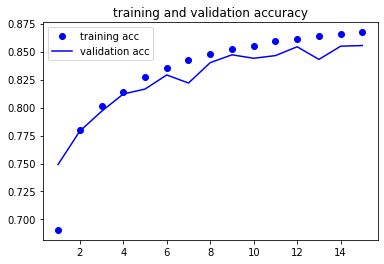

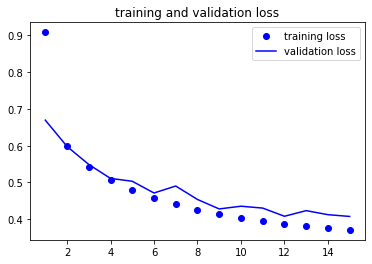

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

## Chapter 5 ***Fine Tuning***

First thing you need is the data. Without it, what are you going to fine tune?

In [9]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
    # unzip data
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

--2019-12-05 00:45:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  99.4MB/s    in 0.7s    

2019-12-05 00:45:02 (99.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Now we get the pretrained models and freeze the base.

In [10]:
from keras.applications import VGG16

conv_base = VGG16(
    weights='imagenet', 
    include_top=False, 
    input_shape=(150, 150, 3))

conv_base.trainable = False

58892288/58889256 [==============================] - 42s 1us/step


Now we take the model and add in our layers. The method to this is just guess really. As far as I can tell, this is an ongoing field of research so If I could answer an algorithm to find the best ones, then I would sure as heck not still be in college.

In [11]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
__________________________________________________

Train the model

In [0]:
# data augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

# compile model

model.compile(
    loss='binary_crossentropy', 
    optimizer=optimizers.RMSprop(lr=2e-5), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
 77/100 [======================>.......] - ETA: 1:11 - loss: 0.6338 - acc: 0.6429

Evaluate

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

Fine tune: Aka, redo and try again and keep messing with it till you get it all happy and nice

In [0]:
# unfreeze convolutional base
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

    # compile model

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-6), 
    metrics=['acc'])

# train

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50)

Check results

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

And Walah, you got yourself a fine tuned system.